### Final Project Submission

 <li> Student Names: Calvine Dasilver
 <li> Student Pace: Full - Time
 <li> Scheduled Review Date/Time: 
 <li> Instructor's: Nikita Njoroge

## Utilizing Machine Learning to Assess Water Well Performance in Tanzania

## **Project Overview**

 ### <li>**Business Understanding**

 Millions in Tanzania face a daily struggle for clean water, forced to walk long distances for water of questionable quality. This water scarcity contributes to a cycle of illness, high infant mortality, and economic stagnation. Uneven water distribution due to Tanzania's diverse climate and geology, coupled with rising demand from agriculture, domestic needs, and other sectors, further complicates the issue. Water wells have been a lifeline for rural communities, but their effectiveness can vary. This project combines machine learning and data visualization to pinpoint potential causes of well failure, predict the success of new wells, and ensure resources are directed to areas with the greatest need.

##### **Challenges facing water access in Tanzania**:

* **Limited Infrastructure**: Tanzania lacks sufficient water infrastructure, particularly in rural areas. This includes a shortage of wells, pipelines, and proper sanitation facilities, leading to reliance on potentially contaminated sources.
* **Uneven Distribution**:  Tanzania's geography and climate create uneven water distribution. Some regions experience frequent droughts, while others have limited groundwater reserves. This disparity leaves many communities struggling despite national averages.
* **Water Quality**: Contaminated water sources are a significant health risk. Lack of proper sanitation and treatment facilities contribute to the spread of waterborne diseases, further impacting public health outcomes.
* **Climate Change**:  The increasing frequency and intensity of droughts due to climate change further exacerbate water scarcity. Erratic weather patterns disrupt traditional rainfall patterns, impacting both surface and groundwater availability.
* **Population Growth**: Tanzania's growing population puts increasing pressure on existing water resources. Rising demand for domestic and agricultural water use threatens to outpace sustainable management practices.
* **Funding and Management**: Insufficient funding for infrastructure development, maintenance, and water management programs limits progress

#### **Proposed Solution**

1. Build More & Smarter: Construct new wells and water systems (pumps, rainwater harvesting) in areas with greatest need, guided by data and community input.

2. Monitor & Maintain: Track water quality with sensors and mobile tech, while training locals on well maintenance and responsible water use.

3. Empower & Collaborate: Partner with local communities, NGOs, and the private sector to share knowledge, manage resources efficiently, and secure funding.

4. Sustainable Financing: Explore innovative funding models like microfinance, user fees, and public-private partnerships for long-term project viability.

#### **Conclusion**

This analysis pinpointed geographic location, construction details, environmental factors, and maintenance practices as crucial influences on well functionality.

#### **Problem Statement**

In rural Tanzania, there's not enough infrastructure for safe drinking water, making it hard for people to access. While the government and NGOs work together to build wells, there's a problem with making sure they keep working in the long run. As the wells start to break down, it slows down the efforts to make sure everyone has enough clean water.

#### **Objectives**
###### *main*
Implement a machine learning model to assess the operational status of water wells in Tanzania
###### *specific*
*  Data Preprocessing and Analysis
*  Model Development and Training
*  Insights Generation and Recommendation Development

### <li> **Data Understanding**
**Data Sources**

Data provided by Taarifa and the Tanzanian Ministry of Water is organized into three separate CSV files:
 https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

1. **Test Set Values**: This file contains the independent variables (features) for which we need the model to predict the water well condition.
2. **Training Set Labels**: This file contains the dependent variable (status_group) for each row in the Training Set Values file. This variable represents the actual condition of the well (e.g., functional, non-functional, needs repair).
3. **Training Set Values**: This file contains the independent variables (features) used to train the machine learning model. These features will be used by the model to learn how to predict the condition of the wells in the Test Set Values file.

**To facilitate understanding of the data, a table outlining the column names and descriptions is provided below**:
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
*  funder - Who funded the well
*  gps_height - Altitude of the well
*  installer - Organization that installed the well
*  longitude - GPS coordinate
*  latitude - GPS coordinate
*  wpt_name - Name of the waterpoint if there is one
*  num_private -
*  basin - Geographic water basin
*  subvillage - Geographic location
*  region - Geographic location
*  region_code - Geographic location (coded)
*  district_code - Geographic location (coded)
*  lga - Geographic location
*  ward - Geographic location
*  population - Population around the well
*  public_meeting - True/False
*  recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint


### Importing relevant libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

First, I will define a fuction that loads the Datasets and check for info and shape of the datasets.


In [53]:
#create a function that loads data and gets the info about the dataset
def load_data_and_check_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    df_1 = pd.read_csv(file_path, index_col='id')

    # Display the first few rows of the DataFrame
    df_head = df_1.head()

    # Get information about the DataFrame
    df_info = df_1.info()

    # Get the shape of the DataFrame
    df_shape = df_1.shape

    print("Data Shape:", df_shape)

    return df_1,df_info, df_head, df_shape

Second, I will create a fuction for checking data types and missing values

In [54]:
def check_data_types_and_missing_values(data):
    
    # Display data types of each column
    data_types = data.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    
    # Check for missing values
    missing_values = data.isnull().sum()
    
    return {"data_types": data_types, "missing_values": missing_values}


#### 1.1 Importing Training Data: We begin by loading the 'Training Set Values' dataset

In [55]:
file_path_1 = "Data\Training_set_values.csv"  # Replace "your_data.csv" with the actual file path
df_1,df_info, df_head , df_shape= load_data_and_check_info(file_path_1)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe



The summary of the observation indicates;

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 59400
* Number of Columns: 39

In [56]:
#check the data types and missing values of DataFrame columns in our training set values.
dtypes_and_mv_df_1 = check_data_types_and_missing_values(df_1)
print("Data types of each column:")
print(dtypes_and_mv_df_1["data_types"])
if dtypes_and_mv_df_1["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_1["missing_values"])

Data types of each column:
{'string': 30, dtype('int64'): 6, dtype('float64'): 3}

Missing values:
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
pa

Key points from data exploration:

* Data types: Mostly text (30 columns), with some integers (6) and floats (3) likely representing categories or continuous values.
* Missing values: Encouragingly, no missing entries in crucial data (amount spent, location, population). However, several others have missing values (>3000 entries) in areas like funders, installers, and management.


#### 1.2 We are loading the 'Training set labels' dataset







In [57]:
#loading dataset
file_path_2 = "Data\Training _set_labels.csv"  # Replace "your_data.csv" with the actual file path
df_2,df_info, df_head , df_shape= load_data_and_check_info(file_path_2)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  59400 non-null  object
dtypes: object(1)
memory usage: 928.1+ KB
Data Shape: (59400, 1)
Shape of the DataFrame: (59400, 1)
None

First few rows of the DataFrame:


,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


This summary reveals:

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 59400
* Number of Columns: 1 (single column)
* Column Name: "status_group" (likely contains labels indicating well condition)
* Sample Values: The preview shows examples of values in the "status_group" column, including "functional" and "non functional" (potential labels for well condition).
* Overall, this seems to be the target DataFrame containing labels for well functionality, which will likely be crucial for training our machine learning model.

In [58]:
#check the data types and missing values of DataFrame columns in our training set labels
dtypes_and_mv_df_2 = check_data_types_and_missing_values(df_2)
print("Data types of each column:")
print(dtypes_and_mv_df_2["data_types"])
if dtypes_and_mv_df_2["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_2["missing_values"])

Data types of each column:
{'string': 1}

No missing values found.


observation review:
* Data Type: All columns in our DataFrame are of type 'string'. This suggests they likely contain textual data.
* Missing Values: There are no missing values found in any of the columns. This is a positive aspect, indicating a complete dataset for our analysis.



#### 1.3 Loading Test Data: 'Test Set Values' 

In [59]:
file_path_3 = "Data\Test_set_values.csv"  # Replace "your_data.csv" with the actual file path
df_3,df_info, df_head , df_shape= load_data_and_check_info(file_path_3)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


The summary of the observation indicates;

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 14,850
* Number of Columns: 39

In [60]:
#check the data types and missing values of DataFrame columns in our training set values.
dtypes_and_mv_df_3 = check_data_types_and_missing_values(df_3)
print("Data types of each column:")
print(dtypes_and_mv_df_3["data_types"])
if dtypes_and_mv_df_3["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_3["missing_values"])

Data types of each column:
{'string': 30, dtype('int64'): 6, dtype('float64'): 3}

Missing values:
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
w

This summary shows data types and missing values. Most data is text (30 columns), with some numbers (6) and decimals (3). While key data like amount spent and location have no missing entries, some others (funders, installers, etc.) have over 800 missing values.

In conclusion, from our 3 datasets,the 'training set values' likely has labels for well condition (e.g., functional/non-functional) to train the model, while the 'test set values' lacks these labels for the model to predict. They likely have the same features describing the wells, but the training set might be larger for effective learning.

## **Data Preposing and Analysis**

### <li> **Data Preparation (Data Blending)**

#### 2.1Merging the training set values and training set labels Datasets


In [61]:
# merging the training set values and training set labels on the 'id' column
try:
    merged_df = pd.merge(df_1, df_2, on='id')
    print(merged_df.head())
except Exception as e:
    print("An error occurred during the merge operation:", e)


       amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   
67743         0.0    2013-01-28        Unicef         263        UNICEF   
19728         0.0    2011-07-13   Action In A           0       Artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   

           

In [62]:
#checking for the shape and information about the new dataset
def check_shape_and_info(data):
    print("Shape of the DataFrame:", data.shape)
    print(data.info())
    return data


In [63]:
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 40)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga           

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#### 2.2 **Data Cleaning**
##### a) Dimensionality Reduction

To enhance the model's performance, we can leverage feature selection techniques. By analyzing feature descriptions from the above **df**, we can identify features that likely have minimal impact on predicting well condition. These features will be removed from the DataFrame to create a more streamlined dataset for model training. The specific features targeted for removal include:
* funder - Who funded the well
* date_recorded - The date the row was entered
* recorded_by - Group entering this row of data
* wpt_name - Name of the waterpoint if there is one
* installer - Organization that installed the well


In [64]:
#dropping the columns that are not needed in the dataset
merged_df.drop(['funder', 'installer', 'date_recorded', 'recorded_by', 'wpt_name',], axis=1, inplace=True)
merged_df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [65]:
#checking for the shape and information about the new dataset
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   num_private            59400 non-null  int64  
 5   basin                  59400 non-null  object 
 6   subvillage             59029 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   district_code          59400 non-null  int64  
 10  lga                    59400 non-null  object 
 11  ward                   59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  scheme_managem

,amount_tsh,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


 *The 5 features have been dropped as per the number of columns in the current dataframe.*

In reviewing the data, I've identified columns with similar names. To ensure data integrity and optimize the DataFrame structure, I will conduct further analysis to determine if these columns contain identical values. If duplicates are found, we can safely remove them, resulting in a more concise and efficient DataFrame for further analysis. The columns I will investigate for potential duplication include:

- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses


<li> source - The source of the water
<li> source_type - The source of the water
<li> source_class - The source of the water


- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


<li> scheme_management - Who operates the waterpoint
<li> scheme_name - Who operates the waterpoint
<li> management - How the waterpoint is managed
<LI> management_group - How the waterpoint is managed


- payment - What the water costs
- payment_type - What the water costs


<li> quantity - The quantity of water
<li> quantity_group - The quantity of water


- water_quality - The quality of the water
- quality_group - The quality of the water


Let's create a function that takes a dataset as input and returns a dictionary. This dictionary should contain information about the unique values in each column. Specifically, for each column, the function should tell me the number of unique values and list the unique values themselves

In [66]:
def check_unique(l):
    for i in l:
        print("Feature Name:", i)
        print("Number of Unique Values:", len(merged_df[i].unique()))
        print("Unique Values:", merged_df[i].unique())
        print('\n')

Let's start by investigating the first set of features with similar names to assess potential duplication.


In [67]:
columns_1 = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

check_unique(columns_1)

Feature Name: extraction_type
Number of Unique Values: 18
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']


Feature Name: extraction_type_group


Number of Unique Values: 13
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']


Feature Name: extraction_type_class
Number of Unique Values: 7
Unique Values: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']




Since "extraction_type" and "extraction_type_group" contain the same information as the more general "extraction_type_class", we can drop them to avoid redundancy. This will streamline our data and make our model more efficient.

In [68]:
#dropping "extraction_type" and "extraction_type_group" columns
merged_df.drop(['extraction_type', 'extraction_type_group'], axis=1, inplace=True)

Second set of features with similar names to assess potential duplication.


In [69]:
columns_2 = ['source', 'source_type', 'source_class']

check_unique(columns_2)

Feature Name: source
Number of Unique Values: 10
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']


Feature Name: source_type
Number of Unique Values: 7
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake']


Feature Name: source_class
Number of Unique Values: 3
Unique Values: ['groundwater' 'surface' 'unknown']




All three features describe the water source, but "source_class" provides the broadest categories. While "source" offers more detailed sub-categories (10 unique options), these sub-categories seem distinct from those in the other two features. Therefore, to avoid redundancy and capture the most informative details, we'll keep "source" and remove the other two features with less informative, potentially overlapping categories.

In [70]:
# dropping "source_type" and "source_class" columns

merged_df.drop(['source_type', 'source_class'], axis=1, inplace=True)


Third set of features with similar names to assess potential duplication.

In [71]:
columns_3 = ['waterpoint_type', 'waterpoint_type_group']

check_unique(columns_3)

Feature Name: waterpoint_type
Number of Unique Values: 7
Unique Values: ['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']


Feature Name: waterpoint_type_group
Number of Unique Values: 6
Unique Values: ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']




Waterpoint_type" offers slightly more detail than "waterpoint_type_group" with an additional category for 'communal standpipe multiple'. However, to avoid redundancy in our model, we'll keep the more concise "waterpoint_type_group".


In [72]:
#dropping "waterpoint_type" column
merged_df.drop(['waterpoint_type'], axis=1, inplace=True)


Fourth set of features with similar names to assess potential duplication.

In [73]:
columns_4 = ['scheme_management', 'scheme_name', 'management', 'management_group']

check_unique(columns_4)

Feature Name: scheme_management
Number of Unique Values: 13
Unique Values: ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


Feature Name: scheme_name
Number of Unique Values: 2697
Unique Values: ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya']


Feature Name: management
Number of Unique Values: 12
Unique Values: ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']


Feature Name: management_group
Number of Unique Values: 5
Unique Values: ['user-group' 'other' 'commercial' 'parastatal' 'unknown']




"Scheme_management" and "management" have similar information, but "management" uses a clearer representation for missing values ("unknown" instead of "nan" and "None"). Additionally, "scheme_name" has too many categories (2697) to be useful for the model. Finally, "management_group" seems redundant since its details are already captured as sub-categories within "management". By dropping these features, we can create a cleaner and more efficient dataset for building our model.

In [74]:
#dropping "scheme_management", "scheme_name" and "management_group" columns

merged_df.drop(['scheme_management', 'scheme_name', 'management_group'], axis=1, inplace=True)


Fifth set of features with similar names to assess potential duplication.

In [75]:
columns_5 = ['payment', 'payment_type']

check_unique(columns_5)

Feature Name: payment
Number of Unique Values: 7
Unique Values: ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']


Feature Name: payment_type
Number of Unique Values: 7
Unique Values: ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']




"Payment_type" and "payment" are redundant (same values). We'll keep "payment_type" for brevity.

In [76]:
#dropping "payment" column
merged_df.drop(['payment'], axis=1, inplace=True)


Sixth set of features with similar names to assess potential duplication.

In [77]:
columns_6 = ['quantity', 'quantity_group']

check_unique(columns_6)

Feature Name: quantity
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']


Feature Name: quantity_group
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']




These two features also have similar values. We will keep "quantity" and remove "quantity_group".


In [78]:
#droping "quantity_group" column

merged_df.drop(['quantity_group'], axis=1, inplace=True)


last set of features with similar names to assess potential duplication.

In [79]:
columns_7 = ['water_quality', 'quality_group']

check_unique(columns_7)

Feature Name: water_quality
Number of Unique Values: 8
Unique Values: ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']


Feature Name: quality_group
Number of Unique Values: 6
Unique Values: ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']




"Water_quality" offers more informative categories, including "salty abandoned" and "fluoride abandoned" which could be crucial for our model. We'll keep "water_quality" and remove the less detailed "quality_group".


In [80]:
#dropping "quality_group" column

merged_df.drop(['quality_group'], axis=1, inplace=True)


To optimize our model, let's explore reducing the number of features containing location data (currently 9). We can start by examining the number of unique values within each feature to identify potential redundancy.

In [81]:
geo_columns = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

check_unique(geo_columns)

Feature Name: longitude
Number of Unique Values: 57516
Unique Values: [34.93809275 34.6987661  37.46066446 ... 34.01708706 35.86131531
 38.10404822]


Feature Name: latitude
Number of Unique Values: 57517
Unique Values: [-9.85632177 -2.14746569 -3.82132853 ... -8.75043433 -6.37857327
 -6.74746425]


Feature Name: basin
Number of Unique Values: 9
Unique Values: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


Feature Name: subvillage
Number of Unique Values: 19288
Unique Values: ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


Feature Name: region
Number of Unique Values: 21
Unique Values: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


Feature Name: region_code
Number of Unique Values: 27
Unique Values: [11 20 21 90 1

Based on our analysis, features like "longitude", "latitude", "subvillage", "lga", and "ward" have a very high number of unique categories. Since these features represent very specific locations, they likely won't generalize well to classify well status across a broader area. To improve model efficiency, we'll remove these features.

In [82]:
#dropping 'lga','latitude', 'subvillage', 'ward','longitude'

merged_df.drop(['lga','latitude', 'subvillage', 'ward','longitude'], axis=1, inplace=True)


Keeping "basin" and "district_code" for broader location context, ditching "region_code" (redundant of "region").

In [83]:
#dropping 'region_code' column
merged_df.drop(['region_code'], axis=1, inplace=True)

# checking the remaining number of columns
len(merged_df.columns)

18

In [84]:
#checking for the shape and information about the new dataset
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   num_private            59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region                 59400 non-null  object 
 5   district_code          59400 non-null  int64  
 6   population             59400 non-null  int64  
 7   public_meeting         56066 non-null  object 
 8   permit                 56344 non-null  object 
 9   construction_year      59400 non-null  int64  
 10  extraction_type_class  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity      

,amount_tsh,gps_height,num_private,basin,region,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,0,Lake Nyasa,Iringa,5,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
8776,0.0,1399,0,Lake Victoria,Mara,2,280,NaN,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25.0,686,0,Pangani,Manyara,4,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,263,0,Ruvuma / Southern Coast,Mtwara,63,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional
19728,0.0,0,0,Lake Victoria,Kagera,1,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


##### **checking for missing values, outliers and correlation in our new dataset from the merged dataframe after merging and performing dimensionality reduction**

##### b) Missing Values

In [86]:
#checking for missing values
check_data_types_and_missing_values(merged_df)


{'data_types': {'string': 12, dtype('int64'): 5, dtype('float64'): 1},
 'missing_values': amount_tsh                  0
 gps_height                  0
 num_private                 0
 basin                       0
 region                      0
 district_code               0
 population                  0
 public_meeting           3334
 permit                   3056
 construction_year           0
 extraction_type_class       0
 management                  0
 payment_type                0
 water_quality               0
 quantity                    0
 source                      0
 waterpoint_type_group       0
 status_group                0
 dtype: int64}

"The features 'public_meeting' and 'permit' contain missing data.

Now,let's fix the missing values in 'public_meeting' and 'permit' with the most frequent value (mode) in each category.

In [90]:
#removing the missing values
# For categorical variables
categorical_columns = ['public_meeting', 'permit']
for col in categorical_columns:
    mode_value = merged_df[col].mode()[0]
    merged_df[col].fillna(mode_value, inplace=True)

missing_values_after_imputation = merged_df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 amount_tsh               0
gps_height               0
num_private              0
basin                    0
region                   0
district_code            0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
status_group             0
dtype: int64


From the output observation our new dataset has no missing value.

##### c) Outliers
To identify potential outliers in our features, we'll analyze their distributions using 5-point summaries and visualize them with boxplots.

In [91]:
merged_df.describe()

,amount_tsh,gps_height,num_private,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,0.474141,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,12.236230,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,0.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,0.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,1776.000000,80.000000,30500.000000,2013.000000


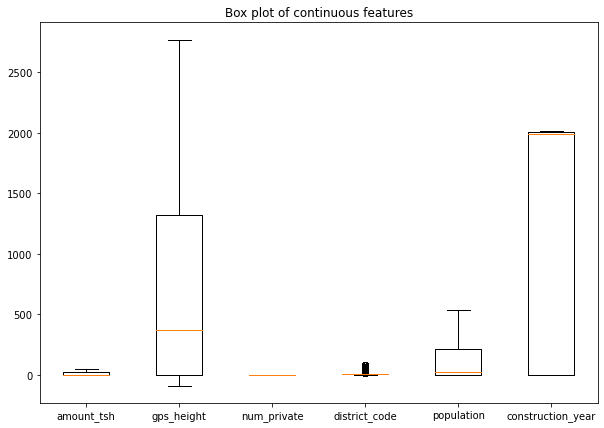

In [104]:
#list of Features with Continuous Data Types

continuous_features = ['amount_tsh', 'gps_height', 'num_private', 'district_code', 'population', 'construction_year']


# Creating boxplots for features with continuous data types
plt.figure(figsize=(10, 7))
plt.boxplot([merged_df[col] for col in continuous_features], labels=continuous_features)
plt.title("Box plot of continuous features")
plt.show()

    


The boxplots and 5-point summaries reveal positive outliers in "amount_tsh", "num_private", and "population". These outliers can affect model performance and preprocessing steps. To address this, we can consider capping outliers to the upper bound of the interquartile range (IQR) instead of replacing them entirely. This approach retains more data while mitigating the influence of extreme values.

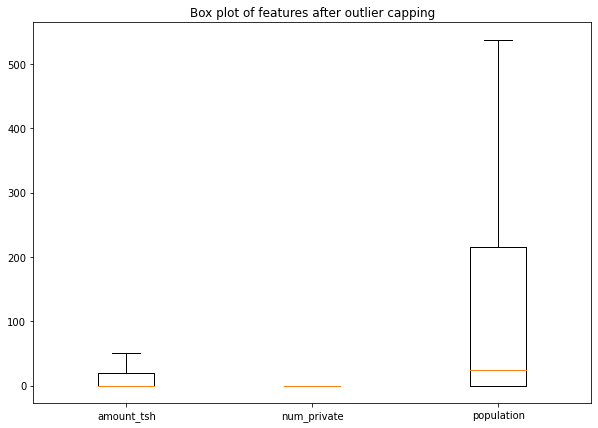

In [103]:
# Define the features with positive outliers
outlier_features = ['amount_tsh', 'num_private', 'population']

# Define a function to cap outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[feature] > upper_bound, feature] = upper_bound

# Apply outlier capping to specified features
for feature in outlier_features:
    cap_outliers(merged_df, feature)

# Plot boxplots after outlier capping
plt.figure(figsize=(10, 7))
plt.boxplot([merged_df[col] for col in outlier_features], labels=outlier_features)
plt.title("Box plot of features after outlier capping")
plt.show()


Outlier values have been modified as part of the data cleaning process

##### d) correlation analysis 

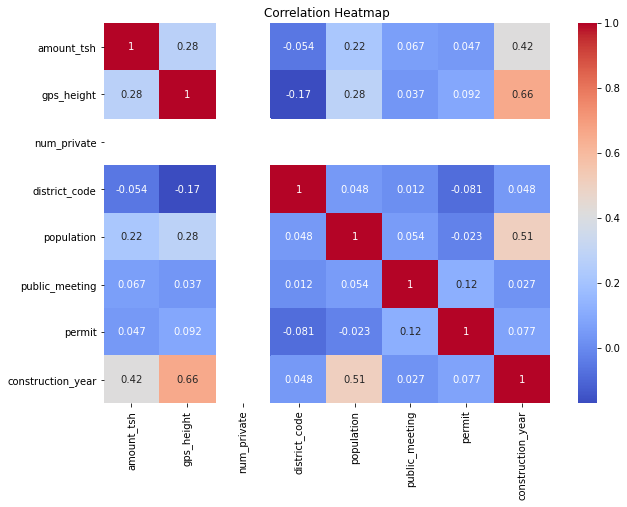

In [105]:
#checking correlation using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


From our observation, we can note there's no feature(s) to be dropped further because no feature(s) is 75% correlated to another feature, therefore we will keep all our features to be used to train our model.

###  <li>**More of Exploratory Data Analysis**

In [109]:
merged_df.head()

,amount_tsh,gps_height,num_private,basin,region,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,
69572,50.0,1390,0.0,Lake Nyasa,Iringa,5,109.0,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
8776,0.0,1399,0.0,Lake Victoria,Mara,2,280.0,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25.0,686,0.0,Pangani,Manyara,4,250.0,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,263,0.0,Ruvuma / Southern Coast,Mtwara,63,58.0,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional
19728,0.0,0,0.0,Lake Victoria,Kagera,1,0.0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


   #### 1.  **Univariate Analysis**

Let's delve into the data by examining individual variables!
In this process, called univariate analysis, we'll focus on one variable at a time. Our goal is to uncover patterns within each variable's distribution. We'll begin by exploring categorical variables, where data falls into distinct categories, and then move on to numerical variables that hold continuous values.